# Начало

In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
smm_train = pd.read_parquet('/content/train_smm.parquet')

In [ ]:
smm_train

,user_id,item_id,timestamp,rating
0,2353151,149597,1673740803033000000,1.554808
1,9824229,90964,1673740803105000000,1.554808
2,6001776,86260,1673740810376000000,1.554808
3,9821399,104024,1673740810924000000,1.554808
4,9280991,8232,1673740814425000000,1.554808
...,...,...,...,...
20689585,5017818,36122,1682414057370000000,1.554808
20689586,8987011,135024,1682414057378000000,1.554808
20689587,9006098,13386,1682414057383000000,1.554808
20689588,1738180,154443,1682414058635000000,1.554808


In [ ]:
smm_train['timestamp'] = pd.to_datetime(smm_train['timestamp'], unit='ns')

In [ ]:
smm_train

,user_id,item_id,timestamp,rating
0,2353151,149597,2023-01-15 00:00:03.033,1.554808
1,9824229,90964,2023-01-15 00:00:03.105,1.554808
2,6001776,86260,2023-01-15 00:00:10.376,1.554808
3,9821399,104024,2023-01-15 00:00:10.924,1.554808
4,9280991,8232,2023-01-15 00:00:14.425,1.554808
...,...,...,...,...
20689585,5017818,36122,2023-04-25 09:14:17.370,1.554808
20689586,8987011,135024,2023-04-25 09:14:17.378,1.554808
20689587,9006098,13386,2023-04-25 09:14:17.383,1.554808
20689588,1738180,154443,2023-04-25 09:14:18.635,1.554808


In [ ]:
smm_train['user_id'].nunique(), smm_train['item_id'].nunique(), smm_train['rating'].nunique()

(183048, 167512, 538)

In [ ]:
smm_train['rating'].mean(), smm_train['rating'].min(), smm_train['rating'].max()

(3.30471283875142, 1.5548076130042918, 19642.208044940402)

# Распределение рейтинга

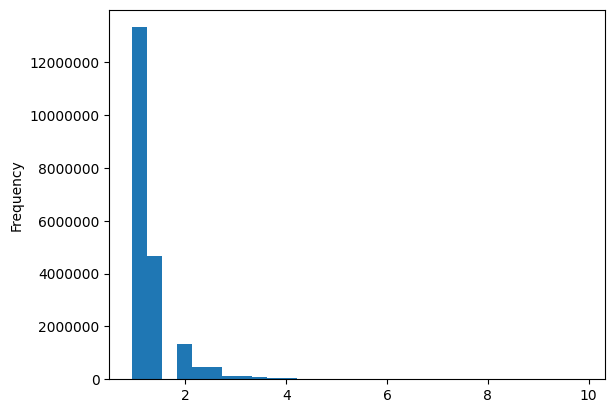

In [ ]:
log_data = np.log1p(smm_train['rating'])
log_data.plot(kind='hist', bins=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

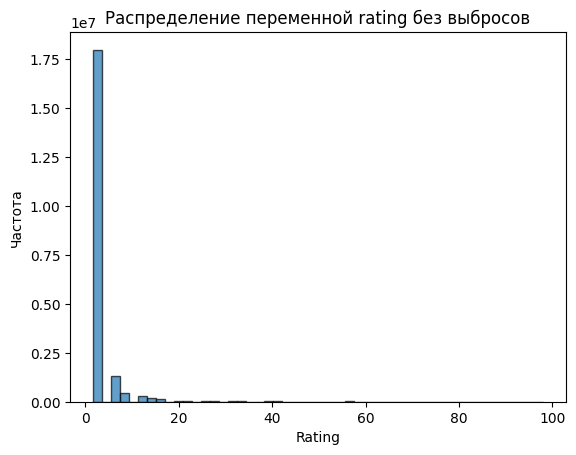

In [ ]:
import matplotlib.pyplot as plt

# Ограничение данных (например, от 0 до 100)
filtered_data = smm_train['rating'][smm_train['rating'] < 100]  # Замените на нужные границы

# Построение гистограммы
filtered_data.plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)

# Подписи и вывод графика
plt.title('Распределение переменной rating без выбросов')
plt.xlabel('Rating')
plt.ylabel('Частота')
plt.show()


In [ ]:
smm_train['rating'].value_counts().head(20)

,count
rating,
1.554808,13317689
2.802427,4669936
5.604853,1329203
8.407280,457953
11.209706,280105
14.012133,177709
16.814560,118803
28.024266,61325
22.419413,45415


In [ ]:
# Создаём объект LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder к столбцу 'rating' для кодирования значений
smm_train['rating_encoded'] = label_encoder.fit_transform(smm_train['rating'])

# Проверим результат
print(f"Количество уникальных значений после кодирования: {len(smm_train['rating_encoded'].unique())}")
print(smm_train[['rating', 'rating_encoded']].head())

Количество уникальных значений после кодирования: 538
     rating  rating_encoded
0  1.554808               0
1  1.554808               0
2  1.554808               0
3  1.554808               0
4  1.554808               0


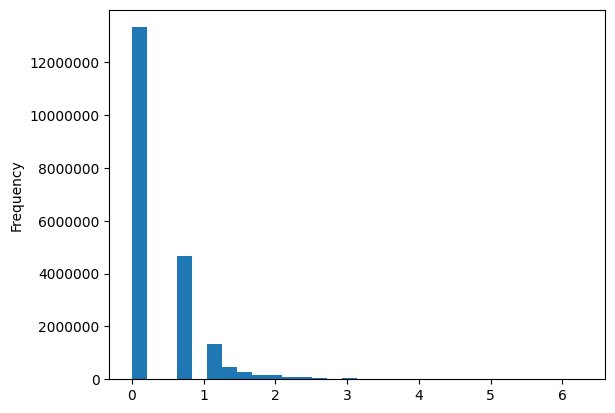

In [ ]:
log_data_enc = np.log1p(smm_train['rating_encoded'])
log_data_enc.plot(kind='hist', bins=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
smm_train

,user_id,item_id,timestamp,rating,rating_encoded
0,2353151,149597,2023-01-15 00:00:03.033,1.554808,0
1,9824229,90964,2023-01-15 00:00:03.105,1.554808,0
2,6001776,86260,2023-01-15 00:00:10.376,1.554808,0
3,9821399,104024,2023-01-15 00:00:10.924,1.554808,0
4,9280991,8232,2023-01-15 00:00:14.425,1.554808,0
...,...,...,...,...,...
20689585,5017818,36122,2023-04-25 09:14:17.370,1.554808,0
20689586,8987011,135024,2023-04-25 09:14:17.378,1.554808,0
20689587,9006098,13386,2023-04-25 09:14:17.383,1.554808,0
20689588,1738180,154443,2023-04-25 09:14:18.635,1.554808,0


# Взаимодействие юзеров и айтемов


In [ ]:
user_interactions = smm_train.groupby('user_id').size()
item_interactions = smm_train.groupby('item_id').size()

In [ ]:
user_interactions.value_counts()

,count
60,3700
50,3109
51,3015
52,2872
53,2715
...,...
1004,1
1115,1
1210,1
1157,1


In [ ]:
item_interactions.value_counts()

,count
35,2742
34,2738
33,2682
37,2680
38,2646
...,...
2332,1
1719,1
17007,1
1364,1


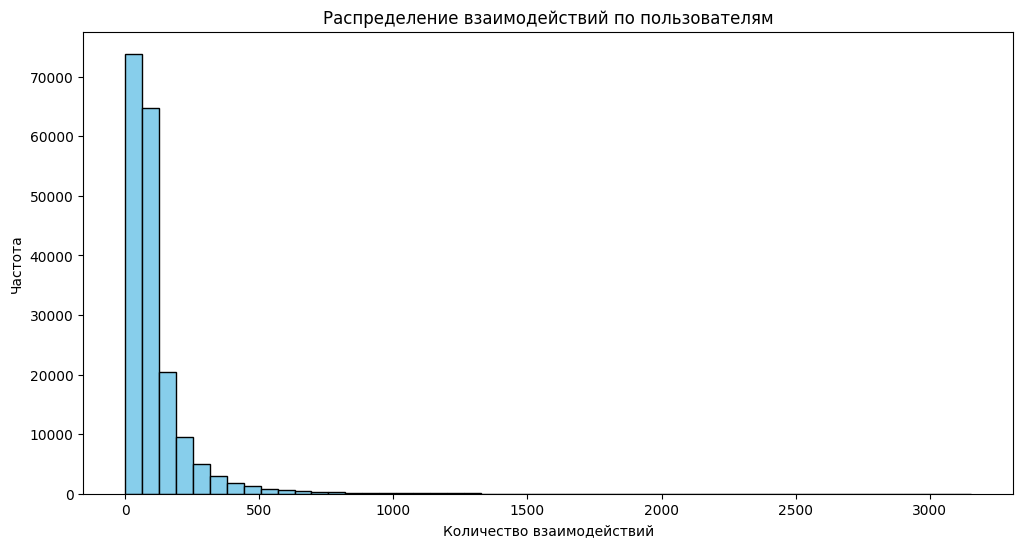

In [ ]:
# Гистограмма по количеству взаимодействий
plt.figure(figsize=(12, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение взаимодействий по пользователям')
plt.xlabel('Количество взаимодействий')
plt.ylabel('Частота')
plt.show()

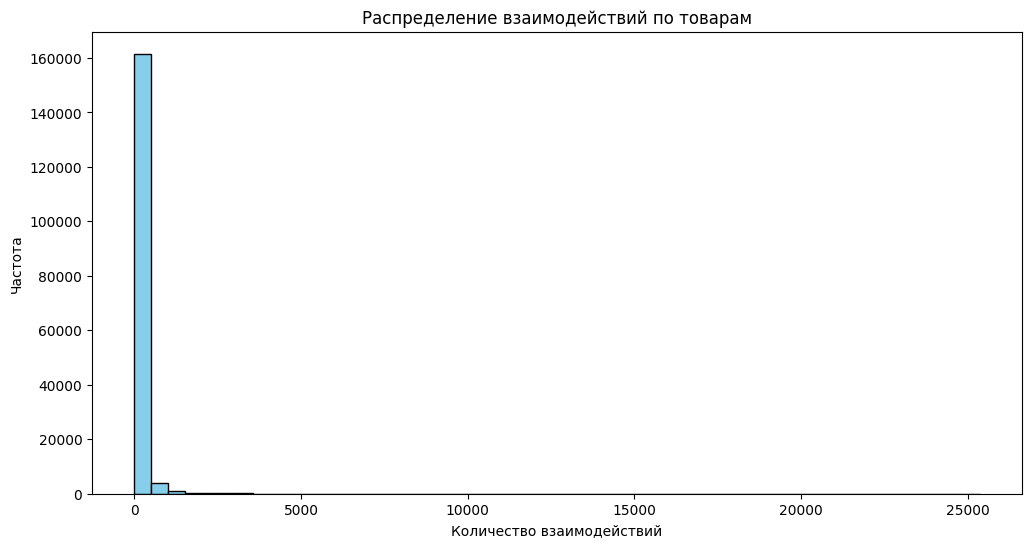

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(item_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение взаимодействий по товарам')
plt.xlabel('Количество взаимодействий')
plt.ylabel('Частота')
plt.show()

# По времени

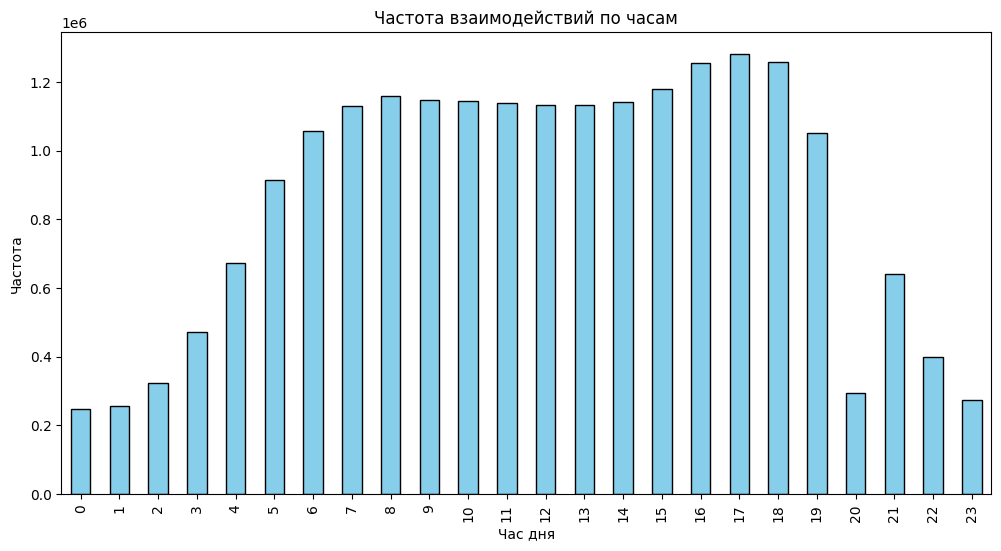

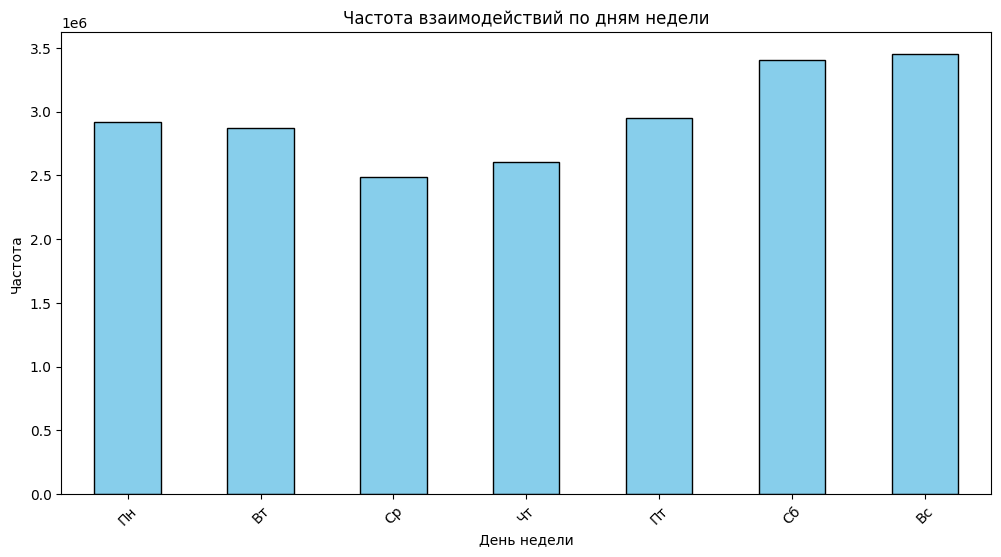

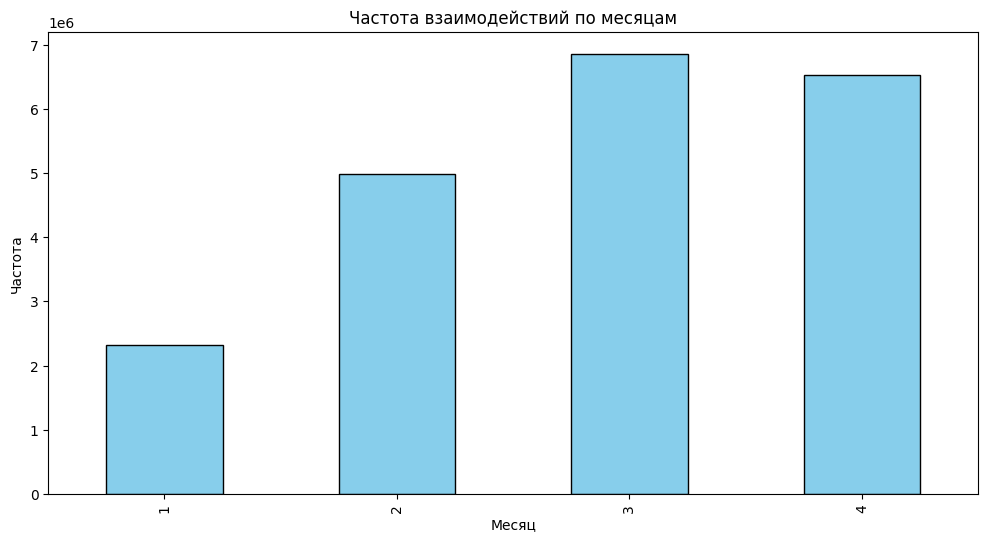

In [ ]:

# Распределение по времени суток
smm_train['hour'] = smm_train['timestamp'].dt.hour
smm_train['day_of_week'] = smm_train['timestamp'].dt.dayofweek
smm_train['month'] = smm_train['timestamp'].dt.month

# Визуализация по часам
plt.figure(figsize=(12, 6))
smm_train['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Частота взаимодействий по часам')
plt.xlabel('Час дня')
plt.ylabel('Частота')
plt.show()

# Визуализация по дням недели
plt.figure(figsize=(12, 6))
smm_train['day_of_week'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Частота взаимодействий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Частота')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], rotation=45)
plt.show()

# Визуализация по месяцам
plt.figure(figsize=(12, 6))
smm_train['month'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Частота взаимодействий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.show()


# Нули и выбросы

In [ ]:
print(f"Количество дублирующихся записей: {smm_train.duplicated().sum()}")

Количество дублирующихся записей: 0


In [ ]:
smm_train.isna().sum()

,0
user_id,0
item_id,0
timestamp,0
rating,0
rating_encoded,0
hour,0
day_of_week,0
month,0


# Обработка

In [ ]:
smm_train

,user_id,item_id,timestamp,rating,rating_encoded,hour,day_of_week,month
0,2353151,149597,2023-01-15 00:00:03.033,1.554808,0,0,6,1
1,9824229,90964,2023-01-15 00:00:03.105,1.554808,0,0,6,1
2,6001776,86260,2023-01-15 00:00:10.376,1.554808,0,0,6,1
3,9821399,104024,2023-01-15 00:00:10.924,1.554808,0,0,6,1
4,9280991,8232,2023-01-15 00:00:14.425,1.554808,0,0,6,1
...,...,...,...,...,...,...,...,...
20689585,5017818,36122,2023-04-25 09:14:17.370,1.554808,0,9,1,4
20689586,8987011,135024,2023-04-25 09:14:17.378,1.554808,0,9,1,4
20689587,9006098,13386,2023-04-25 09:14:17.383,1.554808,0,9,1,4
20689588,1738180,154443,2023-04-25 09:14:18.635,1.554808,0,9,1,4


In [ ]:
duplicate_rows = smm_train.drop(columns=['timestamp']).duplicated(keep=False)

In [ ]:
duplicate_rows.value_counts()

,count
False,20689590


нет дубликатов, то есть данных со всеми одинаковыми строками кроме времени

In [ ]:
duplicate_rows = smm_train[['user_id', 'item_id']].duplicated(keep=False)

In [ ]:
duplicate_rows.value_counts()

,count
False,20689590


в целом нет такого что определенный пользователь взаимодействовал с определенным товаром несколько раз, все взаимодействия уникальны

# Выбросы

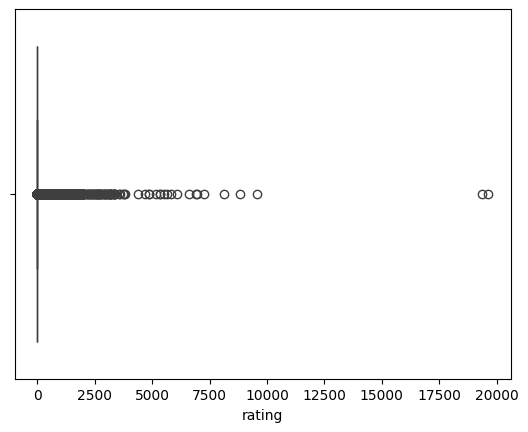

In [ ]:
sns.boxplot(x=smm_train['rating'])
plt.show()

In [ ]:
# Вычисляем квартали
Q1 = smm_train['rating'].quantile(0.25)
Q3 = smm_train['rating'].quantile(0.95)
IQR = Q3 - Q1

# Определяем границы для выбросов
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, удаляя выбросы
smm_train_filtered = smm_train[smm_train['rating'] <= upper_bound]

# Проверяем количество удалённых строк
print(f"Удалено {smm_train.shape[0] - smm_train_filtered.shape[0]} строк")

Удалено 338192 строк


In [ ]:
Q3

8.40727980237141

# ТОП 10


In [ ]:
# Топ 10 самых популярных айтемов
smm_train_filtered['item_id'].value_counts()

,count
item_id,
74610,22223
20776,22186
57107,20895
15432,15329
84537,13928
...,...
64696,1
106781,1
12228,1


In [ ]:
# Считаем количество уникальных пользователей для каждого товара
item_unique_users = smm_train_filtered.groupby('item_id')['user_id'].nunique()

# Считаем количество всех оценок для каждого товара
item_avg_rating = smm_train_filtered.groupby('item_id')['rating'].mean()

# Новый показатель популярности, который учитывает как количество оценок, так и количество уникальных пользователей
popularity_score = item_avg_rating * item_unique_users

# Получим топ-10 товаров по популярности
top_10_items = popularity_score.sort_values(ascending=False).head(10)

# Выводим результат
print("Топ 10 самых популярных товаров с учетом уникальных пользователей и количества оценок:")
print(top_10_items)


Топ 10 самых популярных товаров с учетом уникальных пользователей и количества оценок:
item_id
74610     153844.611896
20776     106247.515668
15432      77533.765831
20166      60417.562373
8146       59928.666204
136398     55914.639474
31984      52636.055379
133412     51504.380634
84537      49441.979814
156085     47071.483234
dtype: float64


In [ ]:
top_10_items.index.tolist()

[74610, 20776, 15432, 20166, 8146, 136398, 31984, 133412, 84537, 156085]

# Фильтрация по порогам  

In [ ]:
cold_users

,count
user_id,
5093995,20
4451585,20
9062904,20
7565615,20
5694493,20
...,...
9620382,1
6042281,1
4103216,1


In [ ]:
# Определим "холодных" пользователей
user_counts = smm_train_filtered['user_id'].value_counts()
threshold = 20
cold_users = user_counts[user_counts <= threshold]
cold_users.index.tolist()


NameError: name 'smm_train_filtered' is not defined

In [ ]:
cold_users.to_csv('cold_users_smm.csv')

In [ ]:
smm_train_filtered = smm_train_filtered[~smm_train_filtered['user_id'].isin(cold_users.index.tolist())]
len(smm_train_filtered)

20292214

In [ ]:
# Определим "холодные" айтемы
item_counts = smm_train_filtered['item_id'].value_counts()
threshold = 30
cold_items = item_counts[item_counts <= threshold]
cold_items.index.tolist()


[32645,
 65147,
 125605,
 159842,
 165671,
 50640,
 18032,
 85610,
 33030,
 64152,
 77811,
 17959,
 160748,
 21563,
 161640,
 146261,
 160057,
 7753,
 161681,
 107473,
 3261,
 148002,
 32151,
 159332,
 108081,
 140194,
 92375,
 125741,
 27495,
 111323,
 150758,
 156241,
 2139,
 140322,
 103857,
 53421,
 84605,
 46035,
 166747,
 38493,
 113034,
 92843,
 42743,
 153594,
 158980,
 119426,
 129047,
 135700,
 45972,
 14714,
 158950,
 30294,
 80083,
 148126,
 6908,
 103312,
 156795,
 58918,
 80864,
 159002,
 155451,
 39207,
 43338,
 36266,
 9930,
 13632,
 41530,
 90239,
 137839,
 72757,
 39772,
 16654,
 37833,
 157867,
 149511,
 90952,
 14686,
 40717,
 160817,
 114747,
 105161,
 48697,
 106747,
 70998,
 20966,
 84338,
 66388,
 89522,
 155107,
 25006,
 152622,
 85674,
 132627,
 130063,
 1496,
 3752,
 31410,
 13906,
 18802,
 123535,
 150927,
 53984,
 76849,
 106529,
 11902,
 92509,
 142360,
 104955,
 4722,
 84650,
 85952,
 126214,
 75635,
 12190,
 98846,
 84016,
 119348,
 63969,
 89349,
 24000

In [ ]:
smm_train_filtered = smm_train_filtered[~smm_train_filtered['item_id'].isin(cold_items.index.tolist())]
len(smm_train_filtered)

19652145

# PREDICT

In [ ]:
def predict(subset_name: str) -> None:
    with open(Path(cfg_data["model_dir"]) / "als.pickle", "br") as f:
        my_model: ALSModel = pickle.load(f)

    my_model.model = my_model.model.to_cpu()
    encoder = my_model.users_encoder
    decoder = {n: id for id, n in encoder.items()}
    indices_info = pd.read_parquet(Path(cfg_data["model_dir"]) / "indices_info.parquet")

    test_data = pd.read_parquet(os.path.join(cfg_data["data_dir"], f"test_{subset_name}.parquet"))

    test_data["user_id"] = test_data["user_id"].map(encoder)

    test_data["weight"] = 1

    left_bound, right_bound = (
        indices_info["left_bound"][subset_name],
        indices_info["right_bound"][subset_name],
    )


    my_model.model.item_factors[:left_bound, :] = 0
    my_model.model.item_factors[right_bound:, :] = 0
    recs, user_ids = my_model.recommend_k(test_data, k=10)
    recs = pd.Series([np.array(x - left_bound) for x in recs.tolist()], index=user_ids)
    recs = recs.reset_index()
    recs.columns = ["user_id", "item_id"]
    recs["user_id"] = recs["user_id"].map(decoder)

    prediction_path = Path(cfg_data["data_dir"]) / f"submission_{subset_name}.parquet"
    recs.to_parquet(prediction_path)


In [ ]:
def predict(subset_name: str) -> None:
    with open(Path(cfg_data["model_dir"]) / "als.pickle", "br") as f:
        my_model: ALSModel = pickle.load(f)

    my_model.model = my_model.model
    encoder = my_model.users_encoder
    decoder = {n: id for id, n in encoder.items()}
    indices_info = pd.read_parquet(Path(cfg_data["model_dir"]) / "indices_info.parquet")

    test_data = pd.read_parquet(os.path.join(cfg_data["data_dir"], f"test_{subset_name}.parquet"))

    cold_users = pd.read_csv(Path(cfg_data["data_dir"]) / "cold_users_smm.csv")["user_id"].tolist()

    top_items = ['74610', '20776', '15432', '20166', '8146', '136398', '31984', '133412', '84537', '156085']

    test_data["user_id"] = test_data["user_id"].map(encoder)

    test_data["weight"] = 1

    left_bound, right_bound = (
        indices_info["left_bound"][subset_name],
        indices_info["right_bound"][subset_name],
    )


    my_model.model.item_factors[:left_bound, :] = 0
    my_model.model.item_factors[right_bound:, :] = 0

    # Результаты рекомендаций
    recs = []
    user_ids = []

    for user_id in test_data["user_id"]:
        # Если пользователь холодный, то добавляем топ-10 популярных товаров
        if user_id in cold_users:
            recs.append(top_items)
            user_ids.append([user_id] * len(top_items))
        else:
            # Иначе, получаем рекомендации от модели
            rec, user_id_list = my_model.recommend_k(pd.DataFrame({"user_id": [user_id]}), k=10)
            recs.append(np.array(rec) - left_bound)  # Смещение индексов
            user_ids.append(user_id_list)

    # Преобразуем результаты в формат DataFrame
    recs_flat = [item for sublist in recs for item in sublist]
    user_ids_flat = [item for sublist in user_ids for item in sublist]

    recs_df = pd.DataFrame({"user_id": user_ids_flat, "item_id": recs_flat})

    # Декодируем user_id обратно
    recs_df["user_id"] = recs_df["user_id"].map(decoder)

    # Сохраняем результаты
    prediction_path = Path(cfg_data["data_dir"]) / f"submission_{subset_name}.parquet"
    recs_df.to_parquet(prediction_path)

